In [1]:
# imports
from google.colab import drive
import pandas as pd
import nltk
from keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords, words
from matplotlib import pyplot as plt
from keras.utils import to_categorical
import numpy as np
from sklearn.model_selection import train_test_split
from keras import models, layers
from collections import Counter

# configurations
path_drive = '/content/drive/'
drive.mount(path_drive)

Mounted at /content/drive/


In [2]:
# Load joined TASS dataset
tassDf = pd.read_csv("drive/MyDrive/AI_final_project_REAL/Project_dataset/ALL_TassDF.csv", encoding='utf8').reset_index(drop=True)[['Text', 'Tag']]

# Select tweets with tag of positive, neative or neutral
tassDf = tassDf.loc[(tassDf.Tag == 'P') | (tassDf.Tag == 'N') | (tassDf.Tag == 'NEU')]

# Verify the final dataset - 57454 tweets
print(tassDf, '\n\n', tassDf.shape)
print(tassDf.columns.values)
print(tassDf.values)

                                                    Text Tag
0      @marizamora94 Ambas son mindblowing, lástima W...   P
1      Yo sé que cada quién hace lo que le da la puta...   N
2      @Phoenix2124 uno siente susto, asco, cólera et...   N
3      Hola @TutzyFF , muchas bendiciones, ves... si ...   P
4      Siempre la paz es lo mejor. De lo sucedido en ...   N
...                                                  ...  ..
81865  Reconozco que me encanta cuando Twitter corre....   P
81866  @Juandecolmenero @angelrubioti @barbara_ruizp ...   P
81868  ¿A qué espera el alcalde promarihuana independ...   N
81869  Esto es lo que hay... Preocupante la flagrante...   N
81870  Rajoy, con el agua al cuello: España se asoma ...   N

[57454 rows x 2 columns] 

 (57454, 2)
['Text' 'Tag']
[['@marizamora94 Ambas son mindblowing, lástima White Collar terminara así de repente, y esperando a la segunda par de la 5ta de Suits'
  'P']
 ['Yo sé que cada quién hace lo que le da la puta gana pero hay mujere

In [3]:
# Load replies to tweets from two Ecuadorian presidential candidates
candidDf = pd.read_csv( 'drive/MyDrive/AI_final_project_REAL/Project_dataset/ALL_candidates.csv', encoding='utf8')

# Merge TASS and canidiate datsets to create the corpus
joinedDfTexts = candidDf['text'].append(tassDf['Text'], ignore_index=True)  # continuous idxs
print(joinedDfTexts, '\n\n', joinedDfTexts.shape)
print(joinedDfTexts.values)

0        @ecuarauz es un payaso !😂😂 https://t.co/PgrRTh...
1        @ecuarauz Todas y todos con INTERNET...un paso...
2        @ecuarauz Cómo que nos oponemos? Cuidado con b...
3        @ecuarauz ¿Alguna propuesta que no se haya ofr...
4        @ecuarauz Vas a repatriar todo lo que los deli...
                               ...                        
59450    Reconozco que me encanta cuando Twitter corre....
59451    @Juandecolmenero @angelrubioti @barbara_ruizp ...
59452    ¿A qué espera el alcalde promarihuana independ...
59453    Esto es lo que hay... Preocupante la flagrante...
59454    Rajoy, con el agua al cuello: España se asoma ...
Length: 59455, dtype: object 

 (59455,)
['@ecuarauz es un payaso !😂😂 https://t.co/PgrRThiPB5'
 '@ecuarauz Todas y todos con INTERNET...un paso más al desarrollo y progreso de nuestro Pais ☝️'
 '@ecuarauz Cómo que nos oponemos? Cuidado con bajarse de la camioneta de quien lo puso ahí.'
 ...
 '¿A qué espera el alcalde promarihuana independentista de 

In [4]:
# Build the one hot matrix considering TASS and candidate datasets
# corpora downloads for nltk
nltk.download('stopwords')

# dictionary size
dictionarySize = 7000

# Function for build the one hot matrix
def build_corpus(tweets):
    # tokenize and get frequency
    topUniqueWordsFiltered = []
    tok = Tokenizer(filters='!"#$%&()*+,-./:;<=>?[\\]^_`{|}~\t\n')
    tok.fit_on_texts(tweets)
    # print(tok.__dict__.items())
    topUniqueWords = sorted(tok.word_counts.items(), key=lambda x: x[1], reverse=True)
    # print(topUniqueWords)
    for word,_ in topUniqueWords:
          if len(word)> 3 and ('@') not in word and 'http' not in word and word not in stopwords.words('spanish') and not word in topUniqueWordsFiltered:
                topUniqueWordsFiltered.append(word)    
    return topUniqueWordsFiltered[:dictionarySize]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
7000 ['gracias', 'rajoy', 'gobierno', 'mejor', 'ahora', 'mañana', 'gran', 'días', 'psoe', 'bien', 'dice', 'españa', 'nuevo', 'feliz', 'años', 'hace', 'madrid', 'hacer', 'bueno', 'buenos', 'solo', 'siempre', 'menos', 'buen', 'rubalcaba', 'reforma', 'congreso', 'quiero', 'puede', 'buena', 'gente', 'buenas', 'andalucía', 'laboral', 'aquí', 'déficit', 'vida', 'trabajo', 'vamos', 'millones', 'parece', 'verdad', 'noche', 'presidente', 'abrazo', 'cada', 'cosas', 'empleo', 'mundo', 'casa', 'semana', 'enhorabuena', 'espero', 'sido', 'pues', 'crisis', 'ayer', 'muchas', 'partido', 'noches', 'país', 'sólo', 'nueva', 'creo', 'nunca', 'tiempo', 'grande', 'tener', 'amigos', 'mismo', 'después', 'gusta', 'foto', 'tras', 'huelga', 'cont', 'personas', '2012', 'hecho', 'cambio', 'igual', 'toda', 'primera', 'twitter', 'decir', 'elcambioandaluz', 'política', 'paro', 'quiere', 'tarde', 'falta', 'rec

In [ ]:
# Build the one hot matrix considering TASS and candidate datasets
corpusDictionary = build_corpus(joinedDfTexts)
print (len(corpusDictionary), corpusDictionary)

(array([29157.,     0.,     0.,     0.,     0., 23127.,     0.,     0.,
            0.,  5170.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

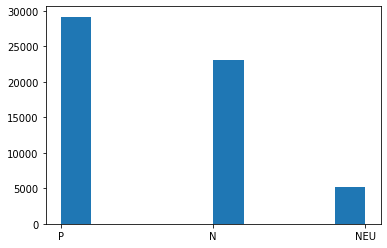

In [5]:
# Observe Tass data set balance, to see if we apply any method for balancing
# histogram to see dataset balance
plt.hist(tassDf['Tag'])

(array([23127.,     0.,     0.,     0.,     0.,  5170.,     0.,     0.,
            0., 29157.]),
 array([0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2000000000000002,
        1.4000000000000001, 1.6, 1.8, 2.0], dtype=object),
 <a list of 10 Patch objects>)

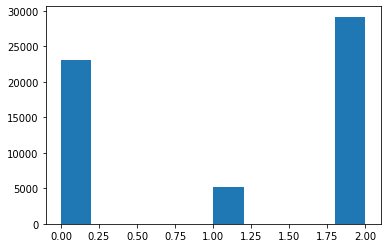

In [6]:
# Transform target names (P, N, NEU) of TASS dataset into integer representation
tassDf.loc[tassDf['Tag'] == 'N', 'Tag'] = 0
tassDf.loc[tassDf['Tag'] == 'NEU', 'Tag'] = 1
tassDf.loc[tassDf['Tag'] == 'P', 'Tag'] = 2

# visualize transformation to numerical classes
plt.hist(tassDf['Tag'])
# transform numerical tags to binary representation
# encoded_tags = to_categorical(tassDf['Tag'], num_classes=3)
#tassDf['Tag'] = tassDf['Tag'].apply(to_categorical, num_classes=3)

In [7]:
# Function to represent tweets as numerical vectors considering the corpus of TASS and candidate datsets as reference
# in this case we have only 1 column
# each row is a tweet represented as vector, corresponding to corpus
def buildWordVectorMatrix(tweetsVect, corpusW):
    # empty numpy matrix of necesary size
    wordVectorMatrix = np.zeros((len(tweetsVect), len(corpusW)))
    # fill matrix, with binary representation of words
    for pos, tweetInPos in enumerate (tweetsVect):
        # split each tweet into a list of its words
        tweetWords = tweetInPos.lower().split()
        # assign value of 1 in matrix position corresponding to the current tweet
        # and the idx each of its contained words is located on the previously built dictionary
        for word in tweetWords:
          # only consider words that are part of the built dictionary
          if word in corpusDictionary:
              wordVectorMatrix[pos, corpusDictionary.index(word)] = 1
    return wordVectorMatrix

In [8]:
# Reprresent TASS dataset as vectors considering the corpus created before
X_data = np.array(buildWordVectorMatrix(tassDf['Text'], corpusDictionary))
#  Select the y (target) of all data
y_data = np.array(tassDf['Tag'])

print('X_data')
print(X_data)
print(X_data.shape)
print('y_data')
print(y_data)
print(y_data.shape)
print(tassDf['Text'])

X_data
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(57454, 7000)
y_data
[2 0 0 ... 0 0 0]
(57454,)
0        @marizamora94 Ambas son mindblowing, lástima W...
1        Yo sé que cada quién hace lo que le da la puta...
2        @Phoenix2124 uno siente susto, asco, cólera et...
3        Hola @TutzyFF , muchas bendiciones, ves... si ...
4        Siempre la paz es lo mejor. De lo sucedido en ...
                               ...                        
81865    Reconozco que me encanta cuando Twitter corre....
81866    @Juandecolmenero @angelrubioti @barbara_ruizp ...
81868    ¿A qué espera el alcalde promarihuana independ...
81869    Esto es lo que hay... Preocupante la flagrante...
81870    Rajoy, con el agua al cuello: España se asoma ...
Name: Text, Length: 57454, dtype: object


X_train
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(28727, 7000)
y_train
[0 2 2 ... 2 2 2]
(28727,)
X_validation
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(14363, 7000)
X_test
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(14364, 7000)
y_validation
[0 0 0 ... 0 2 0]
(14363,)
y_test
[2 0 0 ... 2 1 2]
(14364,)


(array([5782.,    0.,    0.,    0.,    0., 1292.,    0.,    0.,    0.,
        7290.]),
 array([0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2000000000000002,
        1.4000000000000001, 1.6, 1.8, 2.0], dtype=object),
 <a list of 10 Patch objects>)

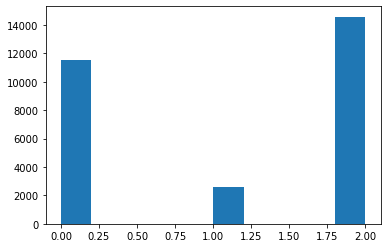

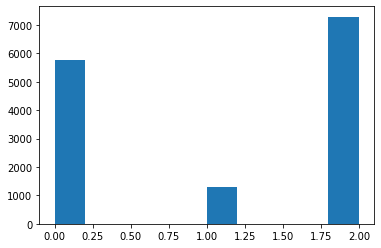

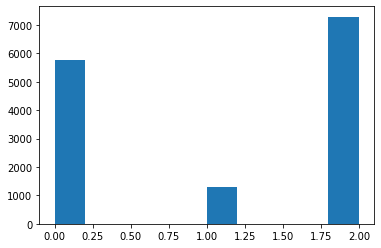

In [9]:
# Divide TASS dataset into training (70%), validation (15%) and test (15%)
# Training and validation-test
X_train, X_other, y_train, y_other = train_test_split(X_data, y_data, test_size=0.50, random_state=1, stratify=y_data)

# divide into validation and test datasets
X_validation, X_test, y_validation, y_test = train_test_split(X_other, y_other, test_size=0.50, random_state=1, stratify=y_other)

print('X_train')
print(X_train)
print(X_train.shape)
print('y_train')
print(y_train)
print(y_train.shape)
print('X_validation')
print(X_validation)
print(X_validation.shape)
print('X_test')
print(X_test)
print(X_test.shape)
print('y_validation')
print(y_validation)
print(y_validation.shape)
print('y_test')
print(y_test)
print(y_test.shape)

# visualize transformation to numerical classes
plt.figure(1)
plt.hist(y_train)
plt.figure(2)
plt.hist(y_validation)
plt.figure(3)
plt.hist(y_test)


In [10]:
# Convert tags to binnary representation using to categorical function from Keras
y_train_bin = to_categorical(y_train, num_classes=3)
y_test_bin = to_categorical(y_test, num_classes=3)
y_validation_bin = to_categorical(y_validation, num_classes=3)

In [11]:
# Create the neuronal network model with keras Sequential class and add layer with given activation functions 
model = models.Sequential()
model.add(layers.Dense(120, activation='relu', input_shape=(len(corpusDictionary),)))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Associate the metrics to the model
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['acc', 'AUC'])

# Run the model with processed data and selected metrics
print('xTest test', X_train.sum(axis=1))
print('X_test', X_train, X_train.shape)
print('y_train_bin', y_train_bin)
train_log = model.fit(X_train, y_train_bin,
                     epochs=10, batch_size=512,
                     validation_data=(X_validation, y_validation_bin))

xTest test [9. 3. 2. ... 2. 3. 3.]
X_test [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (28727, 7000)
y_train_bin [[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
Epoch 1/10
57/57 [==============================] - 5s 73ms/step - loss: 1.0219 - acc: 0.5636 - auc: 0.7355 - val_loss: 0.7137 - val_acc: 0.7397 - val_auc: 0.8703
Epoch 2/10
57/57 [==============================] - 3s 59ms/step - loss: 0.6317 - acc: 0.7735 - auc: 0.8965 - val_loss: 0.6360 - val_acc: 0.7523 - val_auc: 0.8927
Epoch 3/10
57/57 [==============================] - 3s 60ms/step - loss: 0.4970 - acc: 0.8131 - auc: 0.9368 - val_loss: 0.6395 - val_acc: 0.7515 - val_auc: 0.8946
Epoch 4/10
57/57 [==============================] - 4s 69ms/step - loss: 0.4155 - acc: 0.8368 - auc: 0.9560 - val_loss: 0.6702 - val_acc: 0.7544 - val_auc: 0.8924
Epoch 5/10
57/57 [============================

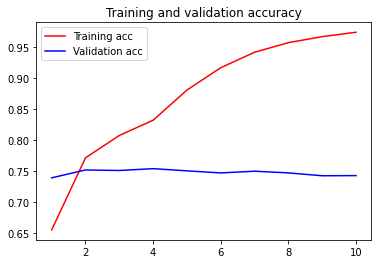

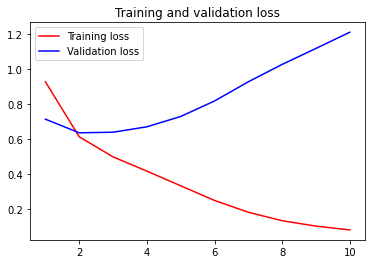

In [12]:
# Model evaluation considering the accuracy of training and validations datasets
acc = train_log.history['acc']
val_acc = train_log.history['val_acc']
loss = train_log.history['loss']
val_loss = train_log.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [13]:
# Calculate the accuracy considering test dataset
test_accuracy = model.evaluate(X_test, y_test_bin)
print('Test Metrics')
print(test_accuracy)

449/449 [==============================] - 1s 3ms/step - loss: 1.2433 - acc: 0.7367 - auc: 0.8665
Test Metrics
[1.2433488368988037, 0.7367028594017029, 0.8665334582328796]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[(2, 494), (0, 420), (1, 86)]
[(0, 496), (2, 405), (1, 99)]

El Resultado para los tweets de Guillermo Lasso
NEGATIVOS: 494
POSITIVOS: 420
NEUTROS: 86

El Resultado para los tweets de Andres Arauz
NEGATIVOS: 496
POSITIVOS: 405
NEUTROS: 99
['Postivo', 'Negativo', 'Neutro']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


<Figure size 432x288 with 0 Axes>

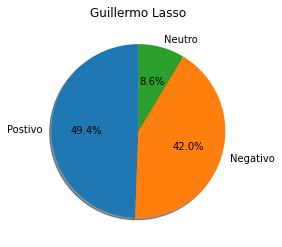

<Figure size 432x288 with 0 Axes>

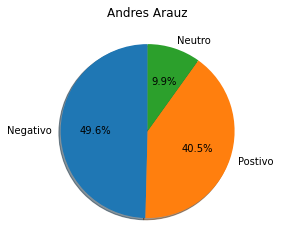

In [14]:
# Import data from replies to tweets of ecuadorian candidates
lassoPath = 'drive/MyDrive/AI_final_project_REAL/Project_dataset/lasso_candidato.csv'
arauzPath = 'drive/MyDrive/AI_final_project_REAL/Project_dataset/arauz_candidato.csv'
lassoDf = pd.read_csv(lassoPath, encoding='utf8').reset_index(drop=True)
arauzDf = pd.read_csv(arauzPath, encoding='utf8').reset_index(drop=True)

# Transform candidate tweets into numercial values by hot encoding
# guillermo lasso candidate
X_lasso = np.array(buildWordVectorMatrix(lassoDf['text'], corpusDictionary))
# predict classes function will be deprecated for multi class distribution use (model.predict(X_lasso) > 0.5).astype("int32") in the future
# or numpy argmax, could be good option
classResultsLasso = model.predict_classes(X_lasso)
lassoPredDistribution = Counter(classResultsLasso).most_common()
print(lassoPredDistribution)
# andres arauz candidate
X_arauz = np.array(buildWordVectorMatrix(arauzDf['text'], corpusDictionary))
classResultsArauz = model.predict_classes(X_arauz) # predict classes function will be deprecated
arauzPredDistribution = Counter(classResultsArauz).most_common()
print(arauzPredDistribution)



# Candidate results
# (0 Negative, 1 neutral, 2 postive)
print('\nEl Resultado para los tweets de Guillermo Lasso')
print(f'NEGATIVOS: {lassoPredDistribution[0][1]}')
print(f'POSITIVOS: {lassoPredDistribution[1][1]}')
print(f'NEUTROS: {lassoPredDistribution[2][1]}')
print('\nEl Resultado para los tweets de Andres Arauz')
print(f'NEGATIVOS: {arauzPredDistribution[0][1]}')
print(f'POSITIVOS: {arauzPredDistribution[1][1]}')
print(f'NEUTROS: {arauzPredDistribution[2][1]}')

# Pie charts
labels = dict()
labels[0] = 'Negativo'
labels[1] = 'Neutro'
labels[2] = 'Postivo'

# Lasso
keysLasso = [ k for k,v in lassoPredDistribution ]
valuesLasso = [ v for k,v in lassoPredDistribution ]

labelsLasso = []
labelsLasso.append(labels[keysLasso[0]])
labelsLasso.append(labels[keysLasso[1]])
labelsLasso.append(labels[keysLasso[2]])
print(labelsLasso)
plt.figure('Guillermo Lasso')
figLasso1, axLasso1 = plt.subplots()
axLasso1.set_title('Guillermo Lasso')
axLasso1.pie([valuesLasso], labels=labelsLasso, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

# Arauz
keysArauz = [ k for k,v in arauzPredDistribution ]
valuesArauz = [ v for k,v in arauzPredDistribution ]
labelsArauz = []
labelsArauz.append(labels[keysArauz[0]])
labelsArauz.append(labels[keysArauz[1]])
labelsArauz.append(labels[keysArauz[2]])
plt.figure('Andres Arauz')
figArauz1, axArauz1 = plt.subplots()
axArauz1.set_title('Andres Arauz')
axArauz1.pie(valuesArauz, labels=labelsArauz, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()